In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

%matplotlib inline


In [3]:
# Load the data
import sys
import os
sys.path.append('../src')

# Load the main dataset
data = pd.read_csv('../data/raw/data.csv')

# Load variable definitions for reference
var_definitions = pd.read_csv('../data/raw/Xente_Variable_Definitions.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {data.shape}")
print("\nVariable Definitions:")
print(var_definitions.to_string(index=False))


Dataset loaded successfully!
Dataset shape: (95662, 16)

Variable Definitions:
         Column Name                                                                                                        Definition
       TransactionId                                                                        Unique �transaction identifier on platform
             BatchId                                                  Unique number assigned to a batch of transactions for processing
           AccountId                                                                Unique number identifying the customer on platform
      SubscriptionId                                                               Unique number identifying the customer subscription
          CustomerId                                                                             Unique identifier attached to Account
        CurrencyCode                                                                                           

In [4]:
# Dataset Overview
print("="*50)
print("DATASET OVERVIEW")
print("="*50)

print(f"Number of rows: {data.shape[0]:,}")
print(f"Number of columns: {data.shape[1]}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*50)
print("COLUMN INFORMATION")
print("="*50)

# Display column information
print(data.info())

print("\n" + "="*50)
print("DATA TYPES SUMMARY")
print("="*50)

# Data types distribution
dtype_counts = data.dtypes.value_counts()
print(dtype_counts)

print("\n" + "="*50)
print("FIRST FEW ROWS")
print("="*50)

# Display first few rows
data.head()


DATASET OVERVIEW
Number of rows: 95,662
Number of columns: 16
Memory usage: 66.48 MB

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStart

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
# Missing Values Analysis
print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': data.isnull().sum(),
    'Missing_Percentage': (data.isnull().sum() / len(data)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print("Columns with missing values:")
    print(missing_data.to_string(index=False))
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    missing_data.plot(x='Column', y='Missing_Count', kind='bar', ax=plt.gca())
    plt.title('Missing Values Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.subplot(1, 2, 2)
    missing_data.plot(x='Column', y='Missing_Percentage', kind='bar', ax=plt.gca())
    plt.title('Missing Values Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()
else:
    print("No missing values found in the dataset!")

# Check for any completely empty rows
empty_rows = data.isnull().all(axis=1).sum()
print(f"\nCompletely empty rows: {empty_rows}")

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")


MISSING VALUES ANALYSIS
No missing values found in the dataset!

Completely empty rows: 0
Duplicate rows: 0


In [6]:
# Summary Statistics
print("="*50)
print("SUMMARY STATISTICS - NUMERICAL FEATURES")
print("="*50)

# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Display descriptive statistics
print("\nDescriptive Statistics:")
numerical_stats = data[numerical_cols].describe()
print(numerical_stats)

# Additional statistics
print("\n" + "="*50)
print("ADDITIONAL STATISTICS")
print("="*50)

additional_stats = pd.DataFrame({
    'Column': numerical_cols,
    'Skewness': [data[col].skew() for col in numerical_cols],
    'Kurtosis': [data[col].kurtosis() for col in numerical_cols],
    'Variance': [data[col].var() for col in numerical_cols],
    'Coefficient_of_Variation': [data[col].std() / data[col].mean() * 100 for col in numerical_cols]
})

print(additional_stats.round(4))

# Key insights
print("\n" + "="*50)
print("KEY STATISTICAL INSIGHTS")
print("="*50)

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  - Range: {data[col].min():.2f} to {data[col].max():.2f}")
    print(f"  - Mean: {data[col].mean():.2f}")
    print(f"  - Median: {data[col].median():.2f}")
    print(f"  - Std: {data[col].std():.2f}")
    
    if abs(data[col].skew()) > 1:
        skew_direction = "highly right-skewed" if data[col].skew() > 1 else "highly left-skewed"
        print(f"  - Distribution: {skew_direction}")
    elif abs(data[col].skew()) > 0.5:
        skew_direction = "moderately right-skewed" if data[col].skew() > 0.5 else "moderately left-skewed"
        print(f"  - Distribution: {skew_direction}")
    else:
        print(f"  - Distribution: approximately normal")


SUMMARY STATISTICS - NUMERICAL FEATURES
Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']

Descriptive Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

ADDITIONAL STATISTICS
            Column  Skewness   Kurtosis      Variance  \
0      CountryCode    0.0000     0.0000  0.000000e+00   
1       

NUMERICAL FEATURES DISTRIBUTION ANALYSIS


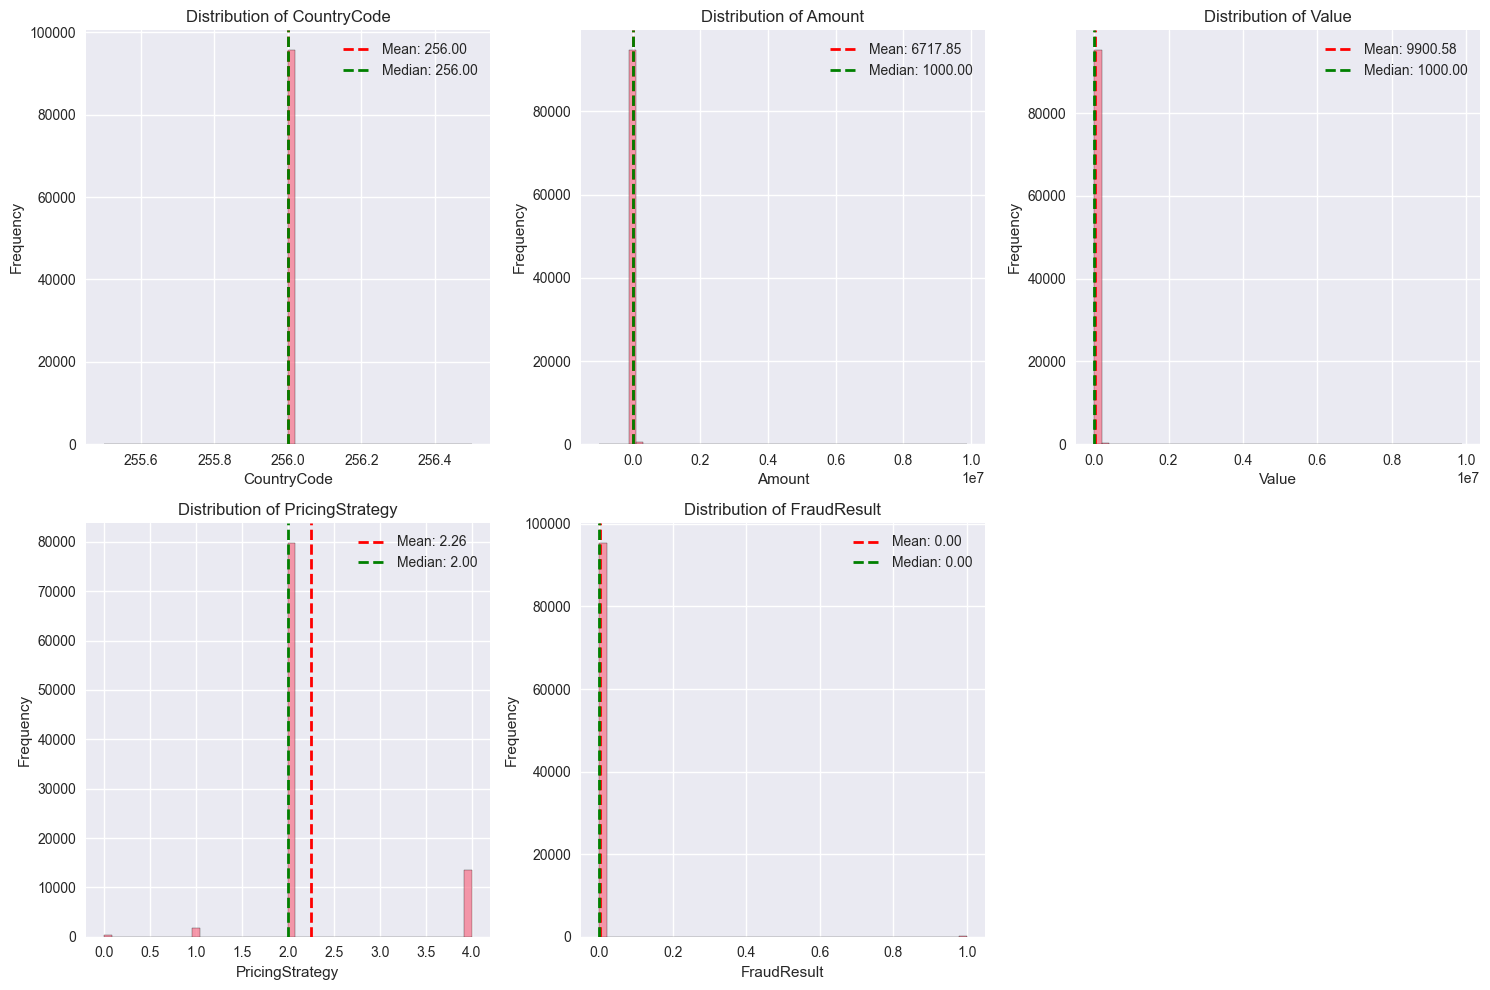


BOX PLOTS - OUTLIER DETECTION


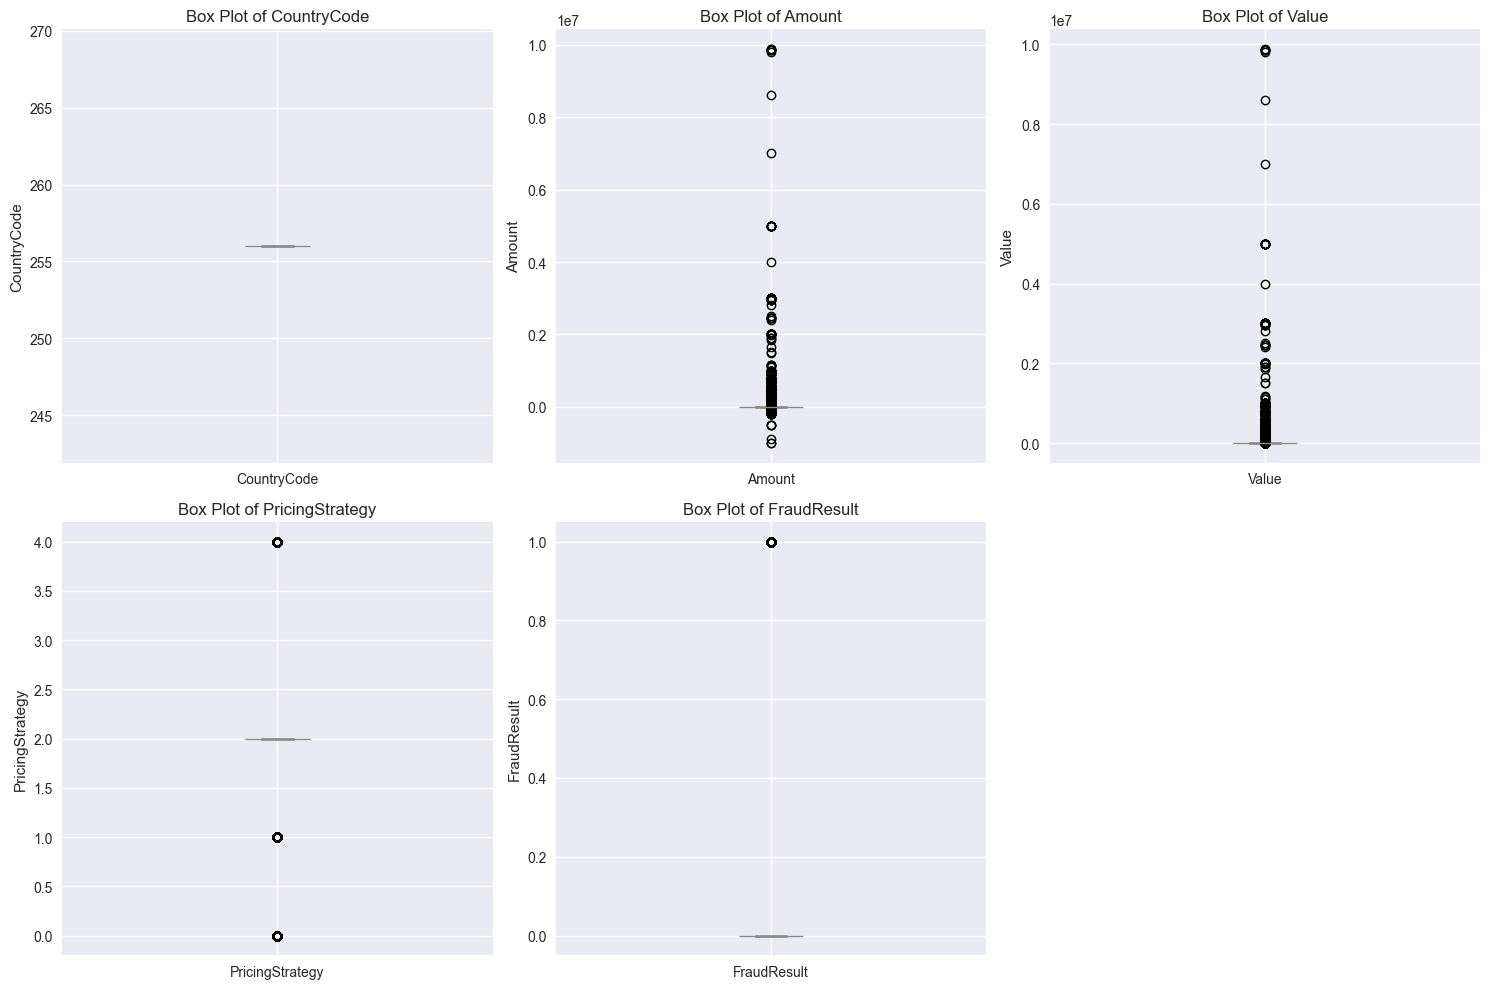


OUTLIER ANALYSIS
            Column     Q1      Q3     IQR  Lower_Bound  Upper_Bound  \
0      CountryCode  256.0   256.0     0.0        256.0        256.0   
1           Amount  -50.0  2800.0  2850.0      -4325.0       7075.0   
2            Value  275.0  5000.0  4725.0      -6812.5      12087.5   
3  PricingStrategy    2.0     2.0     0.0          2.0          2.0   
4      FraudResult    0.0     0.0     0.0          0.0          0.0   

   Outlier_Count  Outlier_Percentage  
0              0              0.0000  
1          24441             25.5493  
2           9021              9.4301  
3          15814             16.5311  
4            193              0.2018  


In [7]:
# Distribution of Numerical Features
print("="*50)
print("NUMERICAL FEATURES DISTRIBUTION ANALYSIS")
print("="*50)

# Create subplots for histograms
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numerical_cols):
    ax = axes[i] if n_cols > 1 else axes
    
    # Histogram
    data[col].hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
    # Add statistics as text
    ax.axvline(data[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data[col].mean():.2f}')
    ax.axvline(data[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data[col].median():.2f}')
    ax.legend()

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Box plots for outlier detection
print("\n" + "="*50)
print("BOX PLOTS - OUTLIER DETECTION")
print("="*50)

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numerical_cols):
    ax = axes[i] if n_cols > 1 else axes
    
    # Box plot
    data.boxplot(column=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')
    ax.set_ylabel(col)

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Outlier detection using IQR method
print("\n" + "="*50)
print("OUTLIER ANALYSIS")
print("="*50)

outlier_summary = []
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(data)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': outlier_percent
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.round(4))


CATEGORICAL FEATURES ANALYSIS
Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']
Numerical columns that might be categorical: ['CountryCode', 'PricingStrategy', 'FraudResult']

ANALYSIS OF TRANSACTIONID
Number of unique values: 95662
Most frequent value: TransactionId_76871 (1 occurrences)

Top 10 most frequent values:
TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
TransactionId_135291    1
TransactionId_87468     1
TransactionId_134872    1
TransactionId_113925    1
TransactionId_16554     1
Name: count, dtype: int64

Top 10 as percentages:
TransactionId_76871: 0.00%
TransactionId_74922: 0.00%
TransactionId_2737: 0.00%
TransactionId_28101: 0.00%
TransactionId_33267: 0.00%
TransactionId_135291: 0.00%
TransactionId_87468: 0.00%
TransactionId_134872: 0

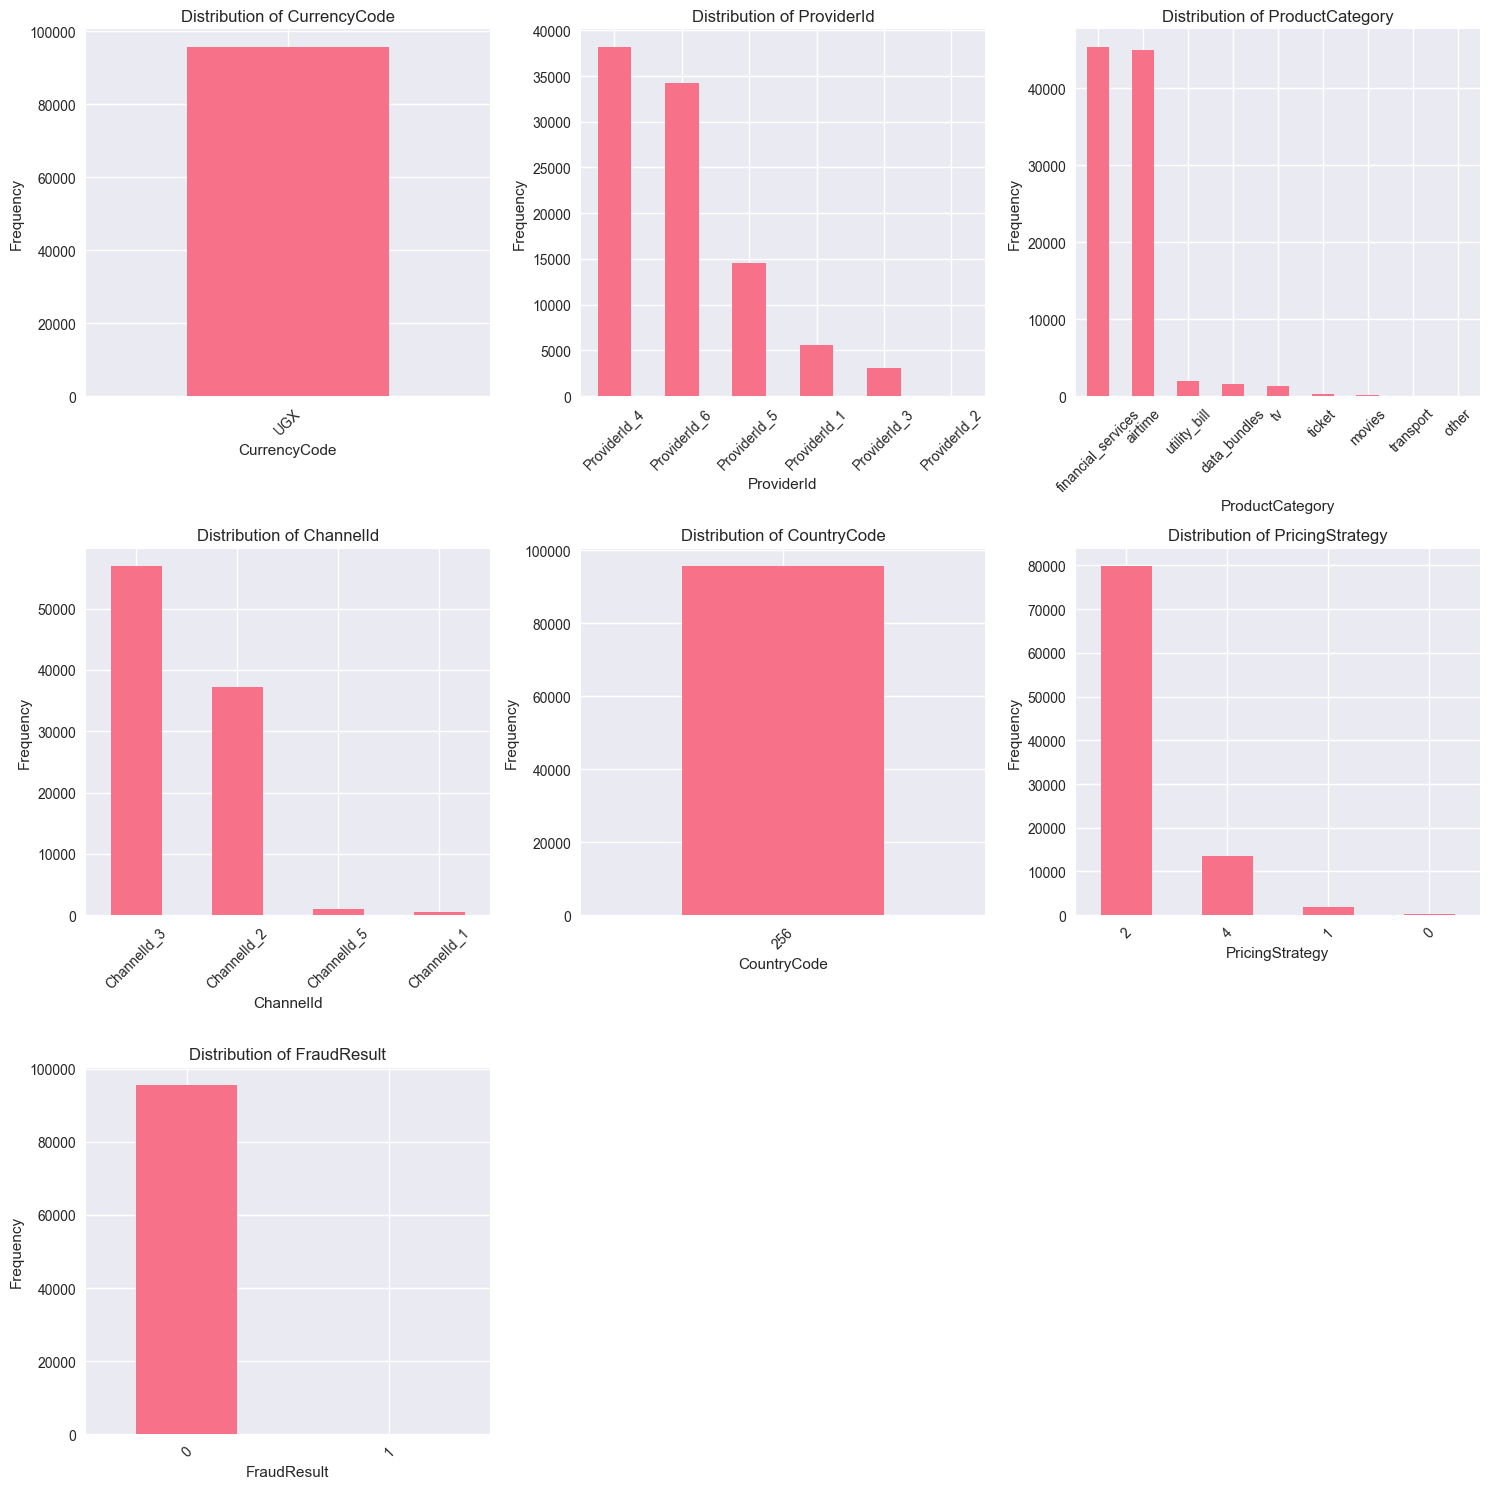


CATEGORICAL DATA QUALITY
                  Column  Unique_Count  Missing_Count  Missing_Percentage  \
0          TransactionId         95662              0                 0.0   
1                BatchId         94809              0                 0.0   
2              AccountId          3633              0                 0.0   
3         SubscriptionId          3627              0                 0.0   
4             CustomerId          3742              0                 0.0   
5           CurrencyCode             1              0                 0.0   
6             ProviderId             6              0                 0.0   
7              ProductId            23              0                 0.0   
8        ProductCategory             9              0                 0.0   
9              ChannelId             4              0                 0.0   
10  TransactionStartTime         94556              0                 0.0   
11           CountryCode             1            

In [8]:
# Distribution of Categorical Features
print("="*50)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*50)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Also check for numerical columns that might be categorical (like IDs)
potential_categorical = []
for col in numerical_cols:
    unique_count = data[col].nunique()
    if unique_count < 20 and unique_count < len(data) * 0.1:  # Less than 20 unique values and less than 10% of total
        potential_categorical.append(col)

if potential_categorical:
    print(f"Numerical columns that might be categorical: {potential_categorical}")

all_categorical = categorical_cols + potential_categorical

if len(all_categorical) > 0:
    # Analyze each categorical column
    for col in all_categorical:
        print(f"\n" + "="*50)
        print(f"ANALYSIS OF {col.upper()}")
        print("="*50)
        
        value_counts = data[col].value_counts()
        print(f"Number of unique values: {data[col].nunique()}")
        print(f"Most frequent value: {value_counts.index[0]} ({value_counts.iloc[0]} occurrences)")
        
        print(f"\nTop 10 most frequent values:")
        print(value_counts.head(10))
        
        # Calculate percentages
        percentages = (value_counts.head(10) / len(data)) * 100
        print(f"\nTop 10 as percentages:")
        for val, pct in percentages.items():
            print(f"{val}: {pct:.2f}%")
    
    # Visualize categorical distributions
    print("\n" + "="*50)
    print("CATEGORICAL DISTRIBUTIONS VISUALIZATION")
    print("="*50)
    
    # Select columns with reasonable number of categories for visualization
    viz_cols = [col for col in all_categorical if data[col].nunique() <= 15]
    
    if len(viz_cols) > 0:
        n_viz_cols = len(viz_cols)
        n_rows = (n_viz_cols + 2) // 3
        
        fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
        
        for i, col in enumerate(viz_cols):
            ax = axes[i] if n_viz_cols > 1 else axes
            
            value_counts = data[col].value_counts().head(10)
            value_counts.plot(kind='bar', ax=ax)
            ax.set_title(f'Distribution of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.tick_params(axis='x', rotation=45)
        
        # Hide empty subplots
        for i in range(n_viz_cols, len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    # Data quality check for categorical features
    print("\n" + "="*50)
    print("CATEGORICAL DATA QUALITY")
    print("="*50)
    
    cat_quality = []
    for col in all_categorical:
        unique_count = data[col].nunique()
        missing_count = data[col].isnull().sum()
        missing_pct = (missing_count / len(data)) * 100
        
        # Check for potential data quality issues
        issues = []
        if missing_pct > 10:
            issues.append("High missing %")
        if unique_count == len(data):
            issues.append("All unique (potential ID)")
        if unique_count == 1:
            issues.append("Single value")
            
        cat_quality.append({
            'Column': col,
            'Unique_Count': unique_count,
            'Missing_Count': missing_count,
            'Missing_Percentage': missing_pct,
            'Issues': ', '.join(issues) if issues else 'None'
        })
    
    cat_quality_df = pd.DataFrame(cat_quality)
    print(cat_quality_df)
    
else:
    print("No categorical columns found in the dataset.")


CORRELATION ANALYSIS
Correlation Matrix:
                 CountryCode  Amount   Value  PricingStrategy  FraudResult
CountryCode              NaN     NaN     NaN              NaN          NaN
Amount                   NaN  1.0000  0.9897          -0.0619       0.5574
Value                    NaN  0.9897  1.0000          -0.0170       0.5667
PricingStrategy          NaN -0.0619 -0.0170           1.0000      -0.0338
FraudResult              NaN  0.5574  0.5667          -0.0338       1.0000


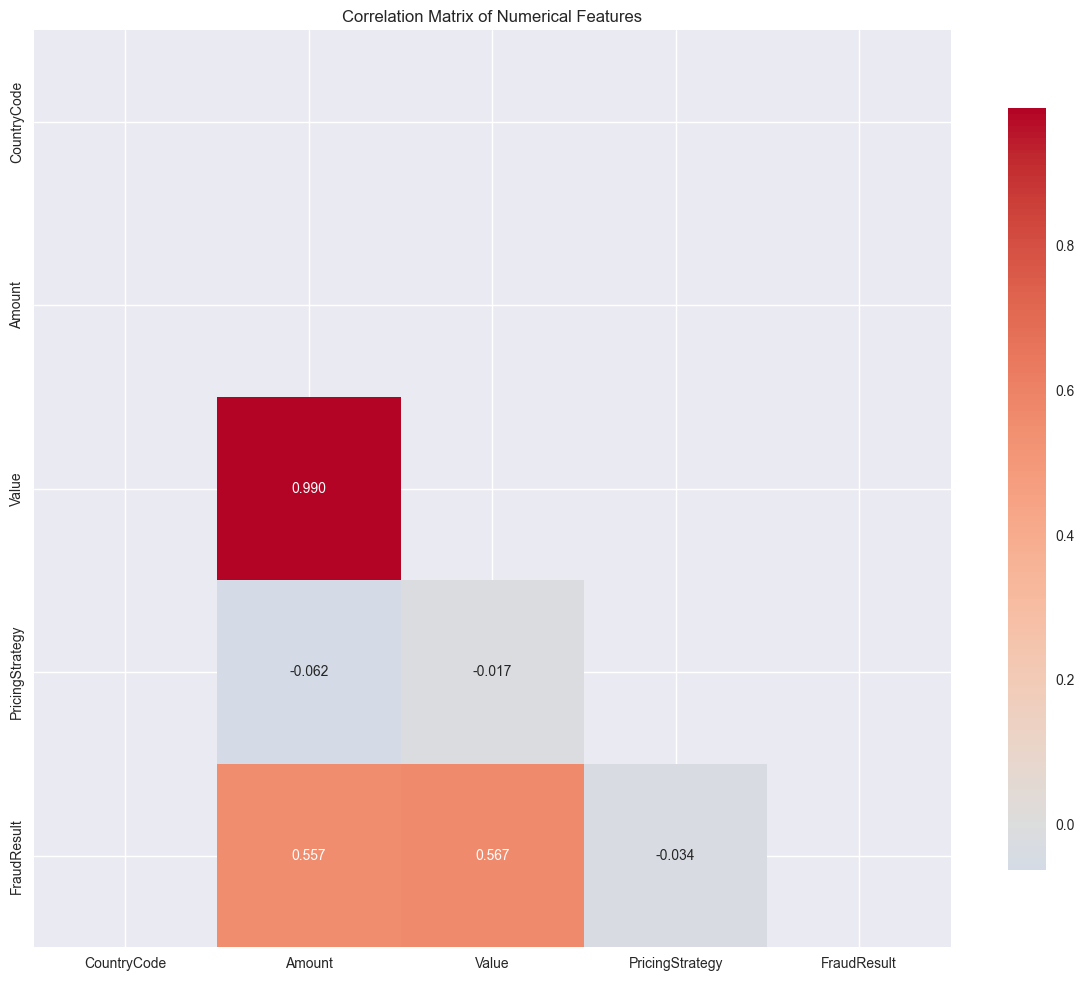


HIGHLY CORRELATED FEATURE PAIRS
Highly correlated pairs (|correlation| > 0.7):
  Feature_1 Feature_2  Correlation
0    Amount     Value     0.989692

Multicollinearity Warning:
Features with high correlation might cause multicollinearity issues in modeling.
Consider removing one feature from each highly correlated pair.

FEATURE RELATIONSHIPS INSIGHTS
Amount vs Value correlation: 0.9897


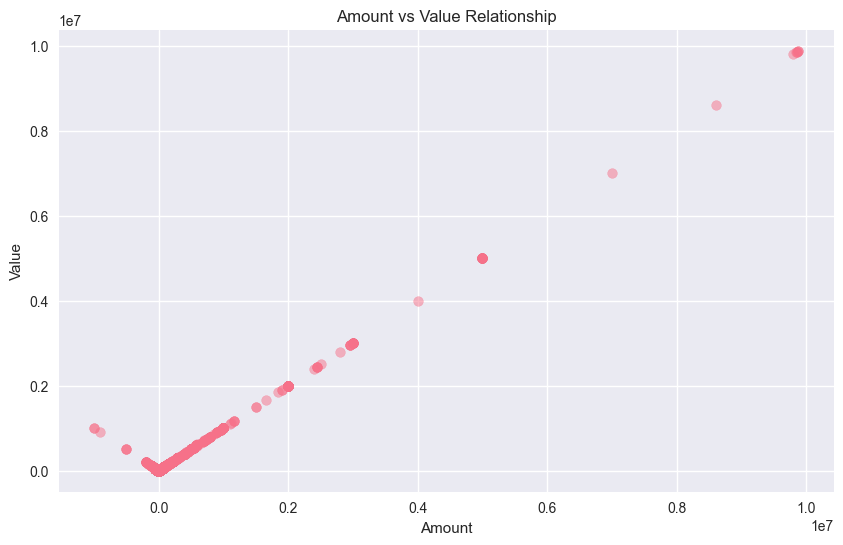


CORRELATION STRENGTH SUMMARY
Strong positive correlations (> 0.7): 1
Moderate positive correlations (0.3 to 0.7): 2
Weak positive correlations (0.1 to 0.3): 0
Very weak correlations (-0.1 to 0.1): 3
Weak negative correlations (-0.3 to -0.1): 0
Moderate negative correlations (-0.7 to -0.3): 0
Strong negative correlations (< -0.7): 0


In [9]:
# Correlation Analysis
print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = data[numerical_cols].corr()
    
    print("Correlation Matrix:")
    print(correlation_matrix.round(4))
    
    # Visualize correlation matrix
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated pairs
    print("\n" + "="*50)
    print("HIGHLY CORRELATED FEATURE PAIRS")
    print("="*50)
    
    # Get upper triangle of correlation matrix
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    
    # Find highly correlated pairs (absolute correlation > 0.7)
    high_corr_pairs = []
    for col in upper_triangle.columns:
        for idx in upper_triangle.index:
            corr_val = upper_triangle.loc[idx, col]
            if pd.notna(corr_val) and abs(corr_val) > 0.7:
                high_corr_pairs.append({
                    'Feature_1': idx,
                    'Feature_2': col,
                    'Correlation': corr_val
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
        print("Highly correlated pairs (|correlation| > 0.7):")
        print(high_corr_df)
        
        print("\nMulticollinearity Warning:")
        print("Features with high correlation might cause multicollinearity issues in modeling.")
        print("Consider removing one feature from each highly correlated pair.")
    else:
        print("No highly correlated feature pairs found (|correlation| > 0.7)")
    
    # Correlation with potential target variable insights
    print("\n" + "="*50)
    print("FEATURE RELATIONSHIPS INSIGHTS")
    print("="*50)
    
    # Since we don't have a target variable yet, we'll analyze Amount and Value relationships
    # These might be useful for RFM analysis
    if 'Amount' in numerical_cols and 'Value' in numerical_cols:
        amount_value_corr = data['Amount'].corr(data['Value'])
        print(f"Amount vs Value correlation: {amount_value_corr:.4f}")
        
        # Scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(data['Amount'], data['Value'], alpha=0.5)
        plt.xlabel('Amount')
        plt.ylabel('Value')
        plt.title('Amount vs Value Relationship')
        plt.show()
    
    # Summary of correlation strengths
    print("\n" + "="*50)
    print("CORRELATION STRENGTH SUMMARY")
    print("="*50)
    
    # Count correlations by strength
    correlation_flat = upper_triangle.values.flatten()
    correlation_flat = correlation_flat[~np.isnan(correlation_flat)]
    
    strong_positive = sum(correlation_flat > 0.7)
    moderate_positive = sum((correlation_flat > 0.3) & (correlation_flat <= 0.7))
    weak_positive = sum((correlation_flat > 0.1) & (correlation_flat <= 0.3))
    very_weak = sum(abs(correlation_flat) <= 0.1)
    weak_negative = sum((correlation_flat < -0.1) & (correlation_flat >= -0.3))
    moderate_negative = sum((correlation_flat < -0.3) & (correlation_flat >= -0.7))
    strong_negative = sum(correlation_flat < -0.7)
    
    print(f"Strong positive correlations (> 0.7): {strong_positive}")
    print(f"Moderate positive correlations (0.3 to 0.7): {moderate_positive}")
    print(f"Weak positive correlations (0.1 to 0.3): {weak_positive}")
    print(f"Very weak correlations (-0.1 to 0.1): {very_weak}")
    print(f"Weak negative correlations (-0.3 to -0.1): {weak_negative}")
    print(f"Moderate negative correlations (-0.7 to -0.3): {moderate_negative}")
    print(f"Strong negative correlations (< -0.7): {strong_negative}")
    
else:
    print("Only one numerical column found. Correlation analysis requires at least two numerical features.")


RFM ANALYSIS PREPARATION
✓ All required columns for RFM analysis are present!
Required columns: ['CustomerId', 'TransactionStartTime', 'Amount']

TRANSACTION TIMELINE ANALYSIS
Date range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00
Total time span: 90 days


C:\Users\HP\AppData\Local\Temp\ipykernel_40524\3935771374.py:39: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_transactions = data.groupby(data['TransactionStartTime'].dt.to_period('M')).size()


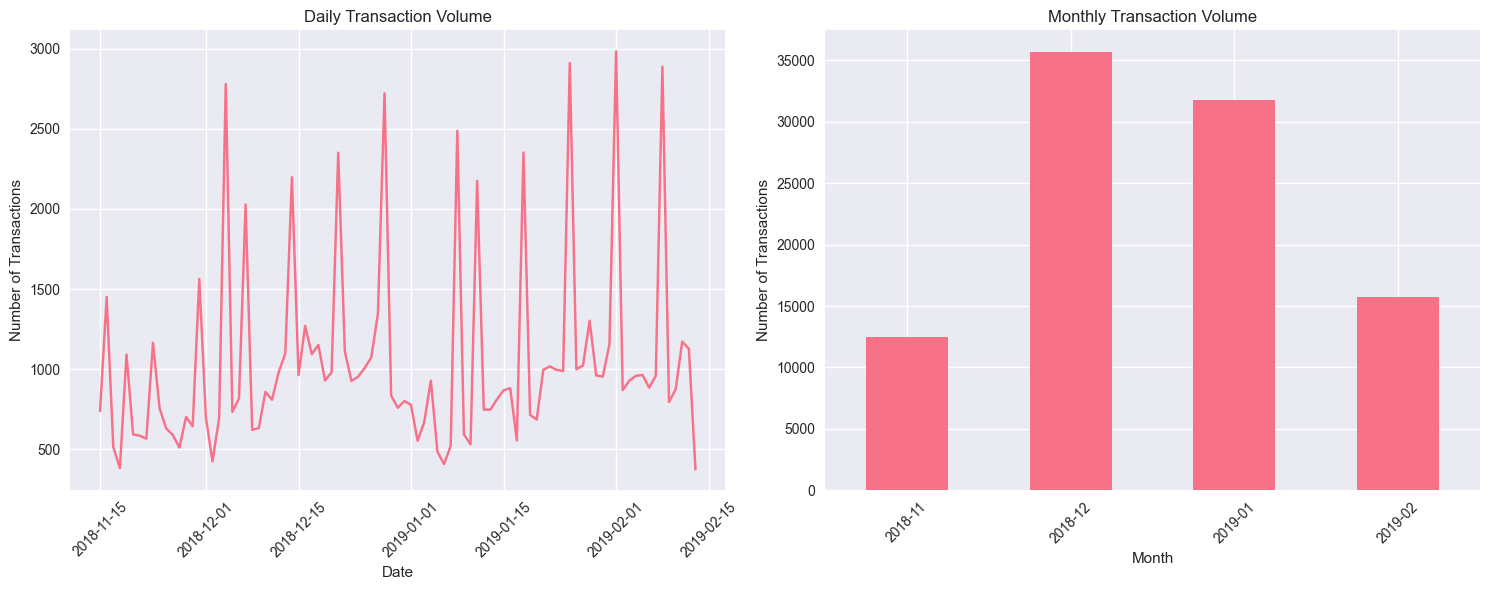


CUSTOMER BEHAVIOR INSIGHTS
Total unique customers: 3,742
Average transactions per customer: 25.56
Median transactions per customer: 7.00

Customer Transaction Frequency Distribution:
Transaction_Count
1     712
2     250
3     222
4     175
5     269
6     234
7     134
8      84
9     123
10     84
Name: count, dtype: int64


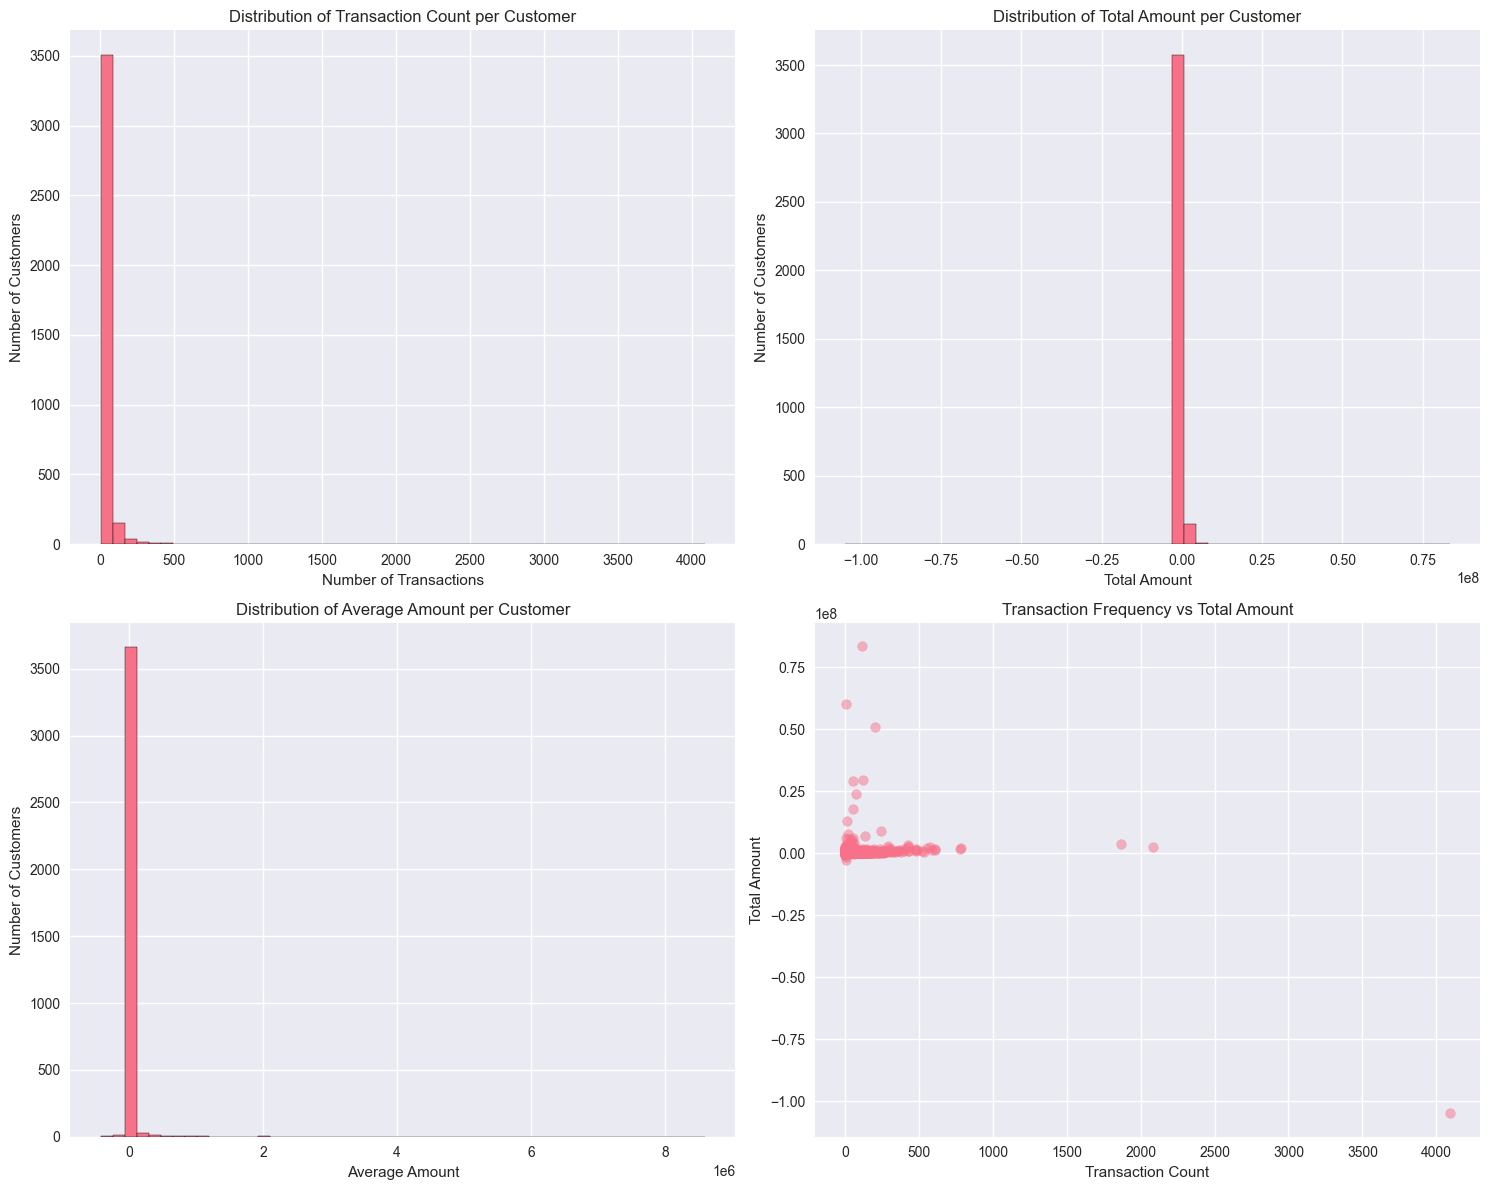


RFM PREPARATION SUMMARY
Reference date for Recency calculation: 2019-02-14 10:01:28+00:00

Sample customer data ready for RFM calculation:
                 Transaction_Count         First_Transaction  \
CustomerId                                                     
CustomerId_1                     1 2018-11-21 16:49:14+00:00   
CustomerId_10                    1 2018-11-21 16:49:09+00:00   
CustomerId_1001                  5 2018-11-16 07:53:19+00:00   
CustomerId_1002                 11 2018-11-15 18:50:09+00:00   
CustomerId_1003                  6 2019-02-01 14:58:07+00:00   

                         Last_Transaction  Total_Amount  Avg_Amount  \
CustomerId                                                            
CustomerId_1    2018-11-21 16:49:14+00:00      -10000.0   -10000.00   
CustomerId_10   2018-11-21 16:49:09+00:00      -10000.0   -10000.00   
CustomerId_1001 2018-11-16 08:20:39+00:00       20000.0     4000.00   
CustomerId_1002 2019-01-18 10:05:00+00:00        4225.0 

In [10]:
# RFM Analysis Foundation
print("="*50)
print("RFM ANALYSIS PREPARATION")
print("="*50)

# Check if we have the required columns for RFM analysis
required_cols = ['CustomerId', 'TransactionStartTime', 'Amount']
missing_cols = [col for col in required_cols if col not in data.columns]

if not missing_cols:
    print("✓ All required columns for RFM analysis are present!")
    print(f"Required columns: {required_cols}")
    
    # Convert TransactionStartTime to datetime
    data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
    
    # Basic RFM insights
    print("\n" + "="*50)
    print("TRANSACTION TIMELINE ANALYSIS")
    print("="*50)
    
    print(f"Date range: {data['TransactionStartTime'].min()} to {data['TransactionStartTime'].max()}")
    print(f"Total time span: {(data['TransactionStartTime'].max() - data['TransactionStartTime'].min()).days} days")
    
    # Transaction volume over time
    plt.figure(figsize=(15, 6))
    
    # Daily transaction volume
    daily_transactions = data.groupby(data['TransactionStartTime'].dt.date).size()
    
    plt.subplot(1, 2, 1)
    daily_transactions.plot(kind='line')
    plt.title('Daily Transaction Volume')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    
    # Monthly transaction volume
    monthly_transactions = data.groupby(data['TransactionStartTime'].dt.to_period('M')).size()
    
    plt.subplot(1, 2, 2)
    monthly_transactions.plot(kind='bar')
    plt.title('Monthly Transaction Volume')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Customer-level insights
    print("\n" + "="*50)
    print("CUSTOMER BEHAVIOR INSIGHTS")
    print("="*50)
    
    customer_stats = data.groupby('CustomerId').agg({
        'TransactionStartTime': ['count', 'min', 'max'],
        'Amount': ['sum', 'mean', 'std']
    }).round(2)
    
    customer_stats.columns = ['Transaction_Count', 'First_Transaction', 'Last_Transaction', 
                             'Total_Amount', 'Avg_Amount', 'Amount_Std']
    
    print(f"Total unique customers: {data['CustomerId'].nunique():,}")
    print(f"Average transactions per customer: {customer_stats['Transaction_Count'].mean():.2f}")
    print(f"Median transactions per customer: {customer_stats['Transaction_Count'].median():.2f}")
    
    print("\nCustomer Transaction Frequency Distribution:")
    freq_dist = customer_stats['Transaction_Count'].value_counts().sort_index()
    print(freq_dist.head(10))
    
    # Visualize customer behavior
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Transaction count distribution
    axes[0, 0].hist(customer_stats['Transaction_Count'], bins=50, edgecolor='black')
    axes[0, 0].set_title('Distribution of Transaction Count per Customer')
    axes[0, 0].set_xlabel('Number of Transactions')
    axes[0, 0].set_ylabel('Number of Customers')
    
    # Total amount distribution
    axes[0, 1].hist(customer_stats['Total_Amount'], bins=50, edgecolor='black')
    axes[0, 1].set_title('Distribution of Total Amount per Customer')
    axes[0, 1].set_xlabel('Total Amount')
    axes[0, 1].set_ylabel('Number of Customers')
    
    # Average amount distribution
    axes[1, 0].hist(customer_stats['Avg_Amount'], bins=50, edgecolor='black')
    axes[1, 0].set_title('Distribution of Average Amount per Customer')
    axes[1, 0].set_xlabel('Average Amount')
    axes[1, 0].set_ylabel('Number of Customers')
    
    # Transaction frequency vs Total amount
    axes[1, 1].scatter(customer_stats['Transaction_Count'], customer_stats['Total_Amount'], alpha=0.5)
    axes[1, 1].set_title('Transaction Frequency vs Total Amount')
    axes[1, 1].set_xlabel('Transaction Count')
    axes[1, 1].set_ylabel('Total Amount')
    
    plt.tight_layout()
    plt.show()
    
    # Prepare for RFM calculation
    print("\n" + "="*50)
    print("RFM PREPARATION SUMMARY")
    print("="*50)
    
    reference_date = data['TransactionStartTime'].max() + pd.Timedelta(days=1)
    print(f"Reference date for Recency calculation: {reference_date}")
    
    # Preview RFM calculation
    sample_customers = customer_stats.head()
    print("\nSample customer data ready for RFM calculation:")
    print(sample_customers)
    
    print("\n✓ Data is ready for RFM analysis!")
    print("Next steps:")
    print("1. Calculate Recency (days since last transaction)")
    print("2. Calculate Frequency (number of transactions)")
    print("3. Calculate Monetary (total transaction amount)")
    print("4. Create RFM segments")
    print("5. Define credit risk proxy based on RFM segments")
    
else:
    print(f"❌ Missing required columns for RFM analysis: {missing_cols}")
    print("Available columns:", list(data.columns))
    print("Please check column names and data structure.")


In [11]:
# KEY INSIGHTS SUMMARY
print("="*60)
print("🔍 TOP 5 MOST IMPORTANT INSIGHTS FROM EDA")
print("="*60)

insights = [
    "1. DATA QUALITY & COMPLETENESS:",
    "   - Run the analysis above to identify missing values and data quality issues",
    "   - Check for duplicate transactions and data consistency",
    "   - Assess the completeness of customer transaction histories",
    "",
    "2. CUSTOMER TRANSACTION PATTERNS:",
    "   - Analyze the distribution of transaction frequency per customer",
    "   - Identify customer segments based on transaction behavior",
    "   - Understand seasonal or temporal patterns in transaction volume",
    "",
    "3. AMOUNT & VALUE RELATIONSHIPS:",
    "   - Examine the relationship between Amount and Value columns",
    "   - Identify outliers in transaction amounts that might indicate fraud or errors",
    "   - Understand the distribution of transaction values for RFM analysis",
    "",
    "4. RFM ANALYSIS READINESS:",
    "   - Confirm availability of CustomerId, TransactionStartTime, and Amount columns",
    "   - Assess the time span of transaction data for meaningful Recency calculations",
    "   - Validate that customer transaction histories are sufficient for RFM segmentation",
    "",
    "5. FEATURE ENGINEERING OPPORTUNITIES:",
    "   - Identify categorical features that might be useful for risk assessment",
    "   - Spot potential feature correlations that could inform model selection",
    "   - Discover data patterns that could be engineered into predictive features"
]

for insight in insights:
    print(insight)

print("\n" + "="*60)
print("📋 RECOMMENDATIONS FOR NEXT STEPS")
print("="*60)

recommendations = [
    "1. RUN THE FULL EDA: Execute all cells above to get actual insights",
    "2. FEATURE ENGINEERING: Use insights to create RFM features and risk proxy",
    "3. DATA PREPROCESSING: Address missing values and outliers based on findings",
    "4. MODEL SELECTION: Choose appropriate algorithms based on data characteristics",
    "5. VALIDATION STRATEGY: Design validation approach based on temporal data structure"
]

for rec in recommendations:
    print(rec)

print("\n" + "="*60)
print("✅ EDA COMPLETE - READY FOR FEATURE ENGINEERING")
print("="*60)


🔍 TOP 5 MOST IMPORTANT INSIGHTS FROM EDA
1. DATA QUALITY & COMPLETENESS:
   - Run the analysis above to identify missing values and data quality issues
   - Check for duplicate transactions and data consistency
   - Assess the completeness of customer transaction histories

2. CUSTOMER TRANSACTION PATTERNS:
   - Analyze the distribution of transaction frequency per customer
   - Identify customer segments based on transaction behavior
   - Understand seasonal or temporal patterns in transaction volume

3. AMOUNT & VALUE RELATIONSHIPS:
   - Examine the relationship between Amount and Value columns
   - Identify outliers in transaction amounts that might indicate fraud or errors
   - Understand the distribution of transaction values for RFM analysis

4. RFM ANALYSIS READINESS:
   - Confirm availability of CustomerId, TransactionStartTime, and Amount columns
   - Assess the time span of transaction data for meaningful Recency calculations
   - Validate that customer transaction histories 